
# Breast Cancer Detection using Machine Learning

This project applies multiple machine learning algorithms to classify breast cancer as malignant or benign using the `sklearn.datasets.load_breast_cancer` dataset. The algorithms used include:

- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- Artificial Neural Network (ANN)

Each model is evaluated using metrics such as **Accuracy**, **Precision**, **Recall**, and **F1 Score**, and the results are visualized using bar charts.


In [23]:
# import and load the dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [24]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset info

In [25]:
# bc.target[0]
bc.target.shape

(569,)

In [26]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [27]:
bc.data.shape

(569, 30)

# Preprocessing

In [28]:
# train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [29]:
# shape of feature data
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
# shape of label data
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")

Feature=> train: (455, 30) - test: (114, 30)
Label=> train: (455,) - test: (114,)


In [30]:
x_train[0]

array([1.506e+01, 1.983e+01, 1.003e+02, 7.056e+02, 1.039e-01, 1.553e-01,
       1.700e-01, 8.815e-02, 1.855e-01, 6.284e-02, 4.768e-01, 9.644e-01,
       3.706e+00, 4.714e+01, 9.250e-03, 3.715e-02, 4.867e-02, 1.851e-02,
       1.498e-02, 3.520e-03, 1.823e+01, 2.423e+01, 1.235e+02, 1.025e+03,
       1.551e-01, 4.203e-01, 5.203e-01, 2.115e-01, 2.834e-01, 8.234e-02])

# Normalize

In [31]:

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [32]:
x_train[400]

array([0.56031994, 0.50871369, 0.55220786, 0.40996819, 0.44389275,
       0.36660328, 0.37347704, 0.43459245, 0.4459596 , 0.23925864,
       0.25623755, 0.34687921, 0.17603543, 0.18135667, 0.29425915,
       0.29011326, 0.13436869, 0.34741428, 0.2244048 , 0.12507082,
       0.52401281, 0.53813318, 0.4725833 , 0.34845655, 0.48928803,
       0.3095051 , 0.31246006, 0.58694158, 0.28424995, 0.18431064])

# Classification

In [33]:
# calculate and show confusion matrix - accuracy - precision - recall 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)    
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)
    c = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    
    
    
    print(f"acc train: {acc_train} - acc test: {acc_test} - precesion: {p} - recall: {r} - confusion matrix: {c}")
    return acc_train, acc_test, p, r, c

## 1. Naive bayes

In [34]:
# naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [35]:
# predict labels and show calculate metrics
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb, c_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9362637362637363 - acc test: 0.956140350877193 - precesion: 0.958904109589041 - recall: 0.9722222222222222 - confusion matrix: [[39  3]
 [ 2 70]]


## 2. KNN

In [36]:
# knn algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [37]:
# predict labels and show calculate metrics
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn, c_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9736263736263736 - acc test: 0.9736842105263158 - precesion: 0.9859154929577465 - recall: 0.9722222222222222 - confusion matrix: [[41  1]
 [ 2 70]]


# 3. Decision tree

In [38]:
# decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=4, criterion='entropy')
dt.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
# predict labels and show calculate metrics
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt, c_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0 - acc test: 0.9210526315789473 - precesion: 0.9315068493150684 - recall: 0.9444444444444444 - confusion matrix: [[37  5]
 [ 4 68]]


# 4. Random Forest


In [40]:
# random forest algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,64
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
# predict labels and show calculate metrics
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf, c_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9934065934065934 - acc test: 0.9649122807017544 - precesion: 0.9594594594594594 - recall: 0.9861111111111112 - confusion matrix: [[39  3]
 [ 1 71]]


# 5. SVM

In [42]:
# svm algorithm
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [43]:
# predict labels and show calculate metrics
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm, c_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.989010989010989 - acc test: 0.9736842105263158 - precesion: 0.9726027397260274 - recall: 0.9861111111111112 - confusion matrix: [[40  2]
 [ 1 71]]


# 6. Logistic Regression

In [44]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
# predict labels and show calculate metrics
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr, c_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9714285714285714 - acc test: 0.9736842105263158 - precesion: 0.9726027397260274 - recall: 0.9861111111111112 - confusion matrix: [[40  2]
 [ 1 71]]


# 7. ANN

In [46]:
# artificial neural networks
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64)
ann.fit(x_train, y_train)

,hidden_layer_sizes,512
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,64
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [47]:
# predict labels and show calculate metrics
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann, c_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9824175824175824 - acc test: 0.9649122807017544 - precesion: 0.9857142857142858 - recall: 0.9583333333333334 - confusion matrix: [[41  1]
 [ 3 69]]


# Comparison

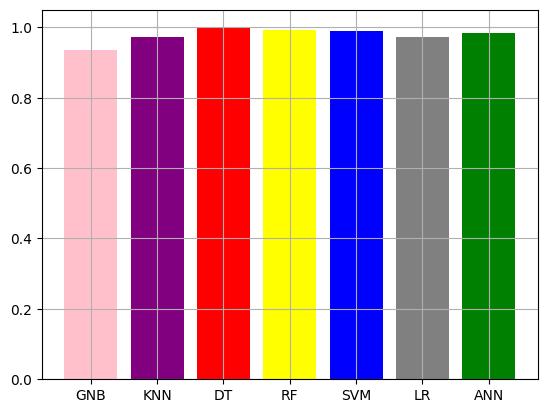

In [48]:
# show the accuracy of trained datas' results on bar chart
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['pink', 'purple', 'red', 'yellow', 'blue', 'gray', 'green']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

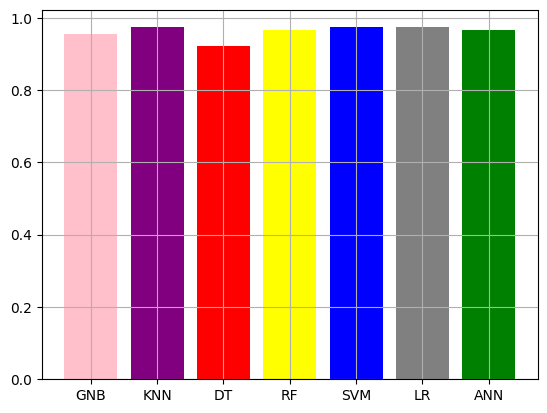

In [49]:
# show the accuracy of tested datas' results on bar chart
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['pink', 'purple', 'red', 'yellow', 'blue', 'gray', 'green']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

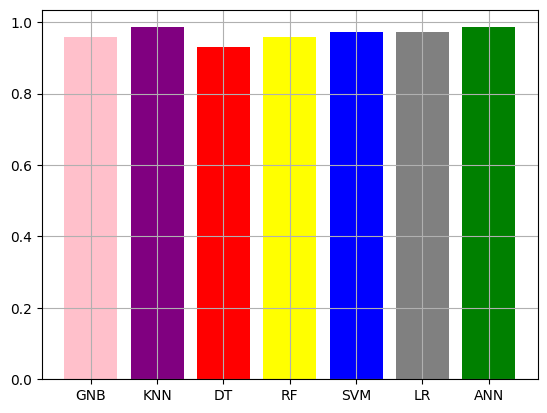

In [50]:
# show the precision of datas' results on bar chart
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['pink', 'purple', 'red', 'yellow', 'blue', 'gray', 'green']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

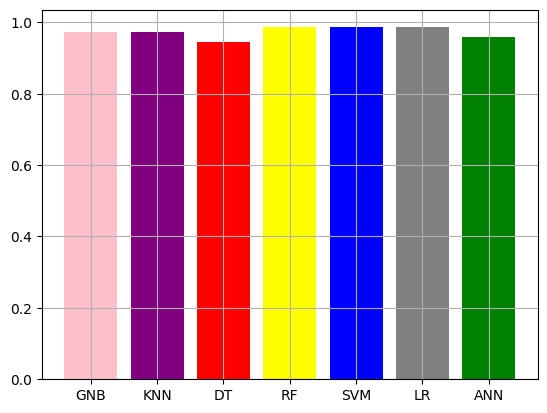

In [51]:
# show the recall of datas' results on bar chart

r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['pink', 'purple', 'red', 'yellow', 'blue', 'gray', 'green']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()